### Import Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Load Dataset

In [25]:
df = pd.read_csv(r"C:\Google Playstore\googleplaystore.csv")
print(df.head())
print(df.info())


                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

### Data Cleaning

In [26]:
import pandas as pd

# Drop missing values
df.dropna(inplace=True)

# Clean Installs column safely
df['Installs'] = (
    df['Installs']
    .astype(str)                                # ensure string for cleaning
    .str.replace('[+,]', '', regex=True)        # remove commas and plus signs
)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce').fillna(0).astype(int)

# Clean Price column safely
df['Price'] = (
    df['Price']
    .astype(str)                                # ensure string
    .str.replace('$', '', regex=True)           # remove $
)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0.0)

# (Optional) Reset index after dropping rows
df.reset_index(drop=True, inplace=True)


###  Exploratory Data Analysis (EDA)

### 1.App Distribution by Category

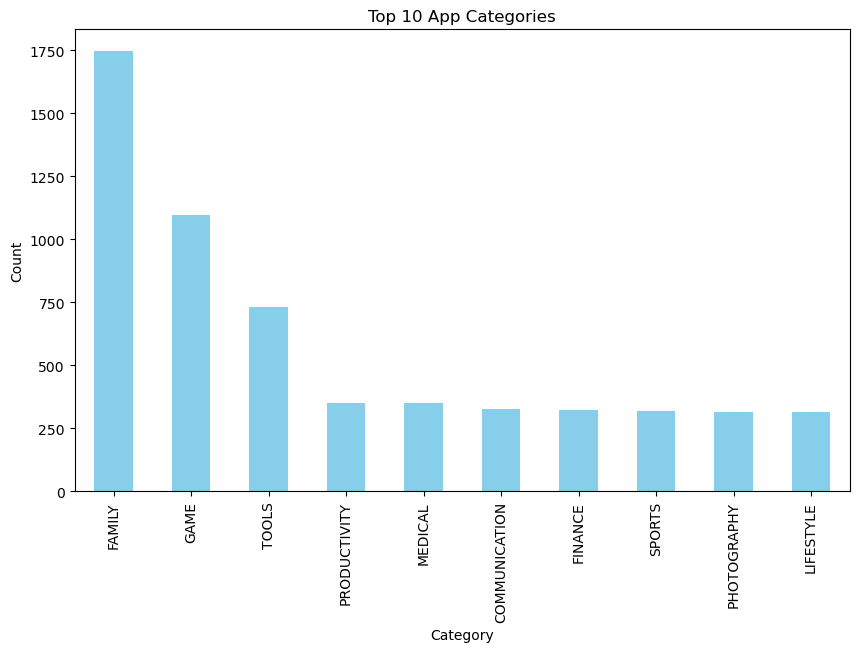

In [27]:
plt.figure(figsize=(10,6))
df['Category'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 App Categories")
plt.ylabel("Count")
plt.show()


### Ratings Distribution

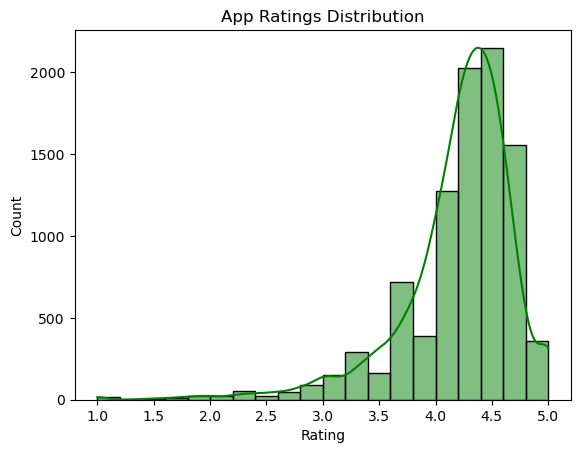

In [28]:
sns.histplot(df['Rating'], bins=20, kde=True, color='green')
plt.title("App Ratings Distribution")
plt.show()


### Installs vs Rating

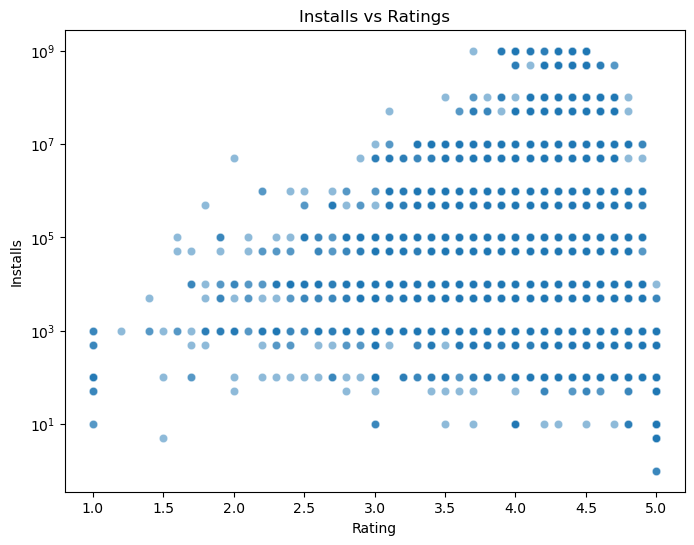

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Rating", y="Installs", data=df, alpha=0.5)
plt.title("Installs vs Ratings")
plt.yscale("log")  # installs scale is huge
plt.show()


### Free vs Paid Apps (Revenue Insights)

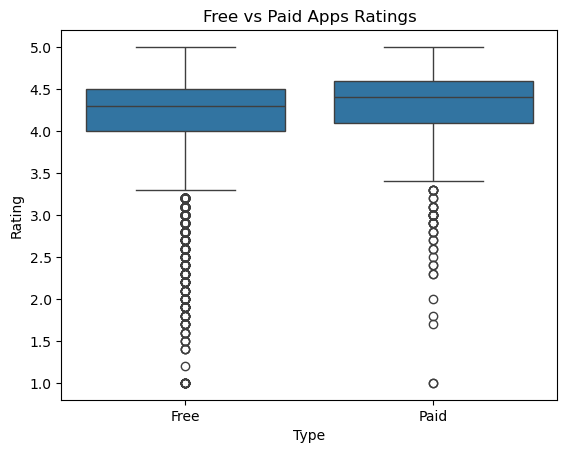

In [30]:
sns.boxplot(x="Type", y="Rating", data=df)
plt.title("Free vs Paid Apps Ratings")
plt.show()


### Advanced Insights

### Correlation between Reviews, Installs, and Rating.

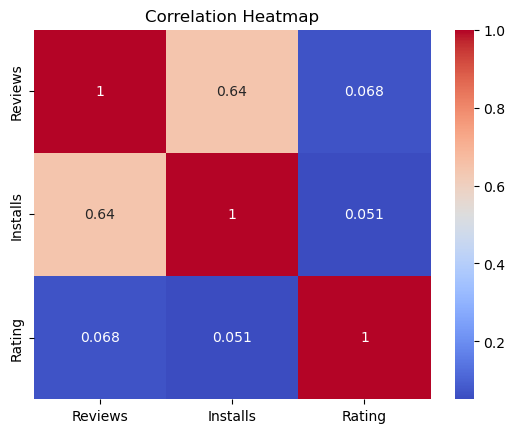

In [31]:
corr = df[['Reviews','Installs','Rating']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


### Top 10 installed apps.

In [32]:
top_installed = df.sort_values(by="Installs", ascending=False).head(10)
print(top_installed[['App','Category','Installs']])


                                           App            Category    Installs
438                                      Gmail       COMMUNICATION  1000000000
3512                                   YouTube       VIDEO_PLAYERS  1000000000
369   Messenger – Text and Video Chat for Free       COMMUNICATION  1000000000
373                                   Hangouts       COMMUNICATION  1000000000
378              Skype - free IM & video calls       COMMUNICATION  1000000000
3534                   Google Play Movies & TV       VIDEO_PLAYERS  1000000000
398               Google Chrome: Fast & Secure       COMMUNICATION  1000000000
3582                               Google News  NEWS_AND_MAGAZINES  1000000000
3611                               Google News  NEWS_AND_MAGAZINES  1000000000
812                          Google Play Games       ENTERTAINMENT  1000000000
